In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [37]:
cpi = pd.read_csv('data/spotrebitelske_ceny.csv', encoding='utf-8') # consumer price index

In [38]:
# We only need certain columns:
cpi = cpi[['hodnota', 'mesic', 'rok', 'obdobiod', 'obdobido' ,'bazobdobiod', 'bazobdobido', 'ucel_txt', 'casz_txt']]
print(f'Before:\n{cpi.dtypes}\n')
# Convert obdobiod and obdobi do into date
cpi['obdobiod'] = pd.to_datetime(cpi['obdobiod'])
cpi['obdobido'] = pd.to_datetime(cpi['obdobido'])
cpi['bazobdobiod'] = pd.to_datetime(cpi['bazobdobiod'])
cpi['bazobdobido'] = pd.to_datetime(cpi['bazobdobido'])
# Convert ucet_txt to string dtype
cpi['ucel_txt'] = cpi['ucel_txt'].astype("string")
cpi['casz_txt'] = cpi['casz_txt'].astype("string")
print(f'After:\n{cpi.dtypes}')

Before:
hodnota        float64
mesic            int64
rok              int64
obdobiod        object
obdobido        object
bazobdobiod     object
bazobdobido     object
ucel_txt        object
casz_txt        object
dtype: object

After:
hodnota               float64
mesic                   int64
rok                     int64
obdobiod       datetime64[ns]
obdobido       datetime64[ns]
bazobdobiod    datetime64[ns]
bazobdobido    datetime64[ns]
ucel_txt       string[python]
casz_txt               object
dtype: object


In [31]:
cpi.head(10)

,hodnota,mesic,rok,obdobiod,obdobido,bazobdobiod,bazobdobido,ucel_txt
0,105.2,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,<NA>
1,106.0,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,Potraviny a nealkoholické nápoje
2,109.7,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,"Alkoholické nápoje, tabák a narkotika"
3,102.9,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,Odívání a obuv
4,104.5,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,"Bydlení, voda, energie, paliva"
5,101.3,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,"Bytové vybavení, zařízení domácnosti; opravy"
6,110.6,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,Zdraví
7,105.0,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,Doprava
8,97.3,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,Komunikace
9,102.1,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,Rekreace a kultura


In [41]:
# Lets see the categories we have
print(list(cpi['ucel_txt'].unique()))
# We can see that there are two types of encoding - utf8 and non-utf8, we need to merge them together
cpi['ucel_txt'] = cpi['ucel_txt'].str.replace('a\xa0', 'a ')
# We can also see NaN values in the data, which according to docs means overall cpi
cpi.fillna({'ucel_txt': 'total'}, inplace=True)
print(list(cpi['ucel_txt'].unique()))

[<NA>, 'Potraviny a\xa0nealkoholické nápoje', 'Alkoholické nápoje, tabák a\xa0narkotika', 'Odívání a\xa0obuv', 'Bydlení, voda, energie, paliva', 'Bytové vybavení, zařízení domácnosti; opravy', 'Zdraví', 'Doprava', 'Komunikace', 'Rekreace a\xa0kultura', 'Vzdělávání', 'Stravování a\xa0ubytování', 'Ostatní výrobky a\xa0služby', 'Alkoholické nápoje, tabák a narkotika', 'Potraviny a nealkoholické nápoje', 'Rekreace a kultura', 'Pošty a telekomunikace', 'Ostatní zboží a služby', 'Odívání a obuv', 'Stravování a ubytování']
['total', 'Potraviny a nealkoholické nápoje', 'Alkoholické nápoje, tabák a narkotika', 'Odívání a obuv', 'Bydlení, voda, energie, paliva', 'Bytové vybavení, zařízení domácnosti; opravy', 'Zdraví', 'Doprava', 'Komunikace', 'Rekreace a kultura', 'Vzdělávání', 'Stravování a ubytování', 'Ostatní výrobky a služby', 'Pošty a telekomunikace', 'Ostatní zboží a služby']


In [83]:
cpi.head(5)

,hodnota,mesic,rok,obdobiod,obdobido,bazobdobiod,bazobdobido,ucel_txt,casz_txt
0,105.2,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,total,průměr bazického roku
1,106.0,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,Potraviny a nealkoholické nápoje,průměr bazického roku
2,109.7,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,"Alkoholické nápoje, tabák a narkotika",průměr bazického roku
3,102.9,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,Odívání a obuv,průměr bazického roku
4,104.5,5,2018,2018-05-01,2018-05-31,2015-01-01,2015-12-31,"Bydlení, voda, energie, paliva",průměr bazického roku


In [88]:
cpi_yearly =  cpi[cpi['casz_txt'] == 'stejných 12 měsíců předchozího roku']
cpi_monthly = cpi[cpi['casz_txt'] == 'stejné období předchozího roku']

In [113]:
def plot_area(sectors):
    fig, ax = plt.subplots()
    line_colors = ["#00BDB1", "#EE5383", "#D69653", "#00ABDF"]
    marker_colors = ["#039188", "#D14972", "#BD874A", "#0395C1"]
    marker_outer_colors = ["#026660", "#91334F", "#986D3C", "#017598"]
    min_hodnota = 100
    max_hodnota = 100
    for i, sector in enumerate(sectors):
        cpi_december = cpi_yearly[cpi_yearly['mesic'] == 12]
        data = cpi_december[cpi_december['ucel_txt'] == sector].copy()
        data.sort_values(by=['rok', 'mesic'], inplace=True)
        ax.plot(data['rok'], data['hodnota']-100, marker='o', color=line_colors[i], mfc=marker_colors[i], mec=marker_outer_colors[i] )
        max_hodnota = max(max_hodnota, max(data['hodnota']))
        min_hodnota = min(min_hodnota, min(data['hodnota']))
        print(min(data['hodnota']))
    ax.tick_params(axis='x', labelrotation=45)
    #plt.legend(sectors)
    ax.set_xticks(data['rok'])
    print(min_hodnota, max_hodnota)
    #ax.set_yticks([0, 1, 2, 3, 4, 5, 6,7,8,9, 10,11,12,13,14,15])
    #set y ticks from 0 every 2 steps:
    ax.set_yticks(np.arange(min_hodnota-100, max_hodnota-100, 2))
    ax.grid(True, axis='y', alpha=0.5, linestyle='--')
    if len(sectors) > 1:
        ax.legend(sectors)
    ax.set_xlabel('Year')
    ax.set_ylabel('Consumer price difference from previous year (%)')
    ax.set_title(f'Consumer price index development in Czech republic')

In [109]:
cpi['ucel_txt'].unique()

<StringArray>
[                                       'total',
             'Potraviny a nealkoholické nápoje',
        'Alkoholické nápoje, tabák a narkotika',
                               'Odívání a obuv',
               'Bydlení, voda, energie, paliva',
 'Bytové vybavení, zařízení domácnosti; opravy',
                                       'Zdraví',
                                      'Doprava',
                                   'Komunikace',
                           'Rekreace a kultura',
                                   'Vzdělávání',
                       'Stravování a ubytování',
                     'Ostatní výrobky a služby',
                       'Pošty a telekomunikace',
                       'Ostatní zboží a služby']
Length: 15, dtype: string

96.1
94.0
98.6
92.9
92.9 131.4


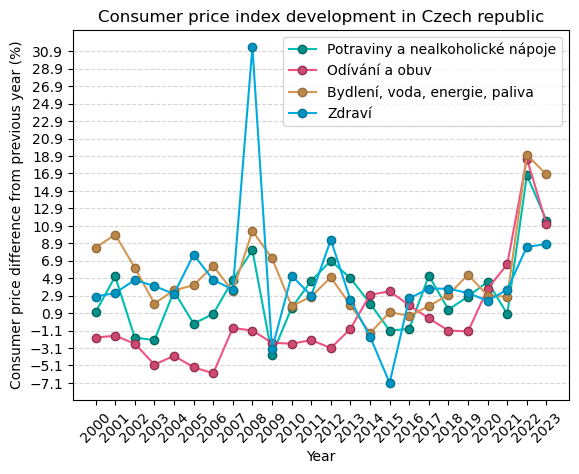

In [114]:
plot_area(['Potraviny a nealkoholické nápoje', 'Odívání a obuv', 'Bydlení, voda, energie, paliva', 'Zdraví'])

In [107]:
def heatmap_monthly(sector, color):
    if color == 'blue':
        central_color = "#026660"
    elif color == 'pink':
        central_color = "#91334F"
    colors = [(1, 1, 1), central_color]  # from white to the central color
    n_bins = 100 
    cmap_name = 'custom_cmap'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    data_sector = cpi_monthly[cpi_monthly['ucel_txt'] == sector].sort_values(['rok', 'mesic'])
    pivot = data_sector.pivot(index='rok', columns='mesic', values='hodnota')
    
    plt.figure(figsize=(10, 12))
    ax = sns.heatmap(pivot, cmap=cm, annot=True, fmt=".1f")
    plt.title('Heatmap of Values by Year and Month')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='y', labelrotation=0)
    plt.xlabel('Month')
    plt.ylabel('Year')

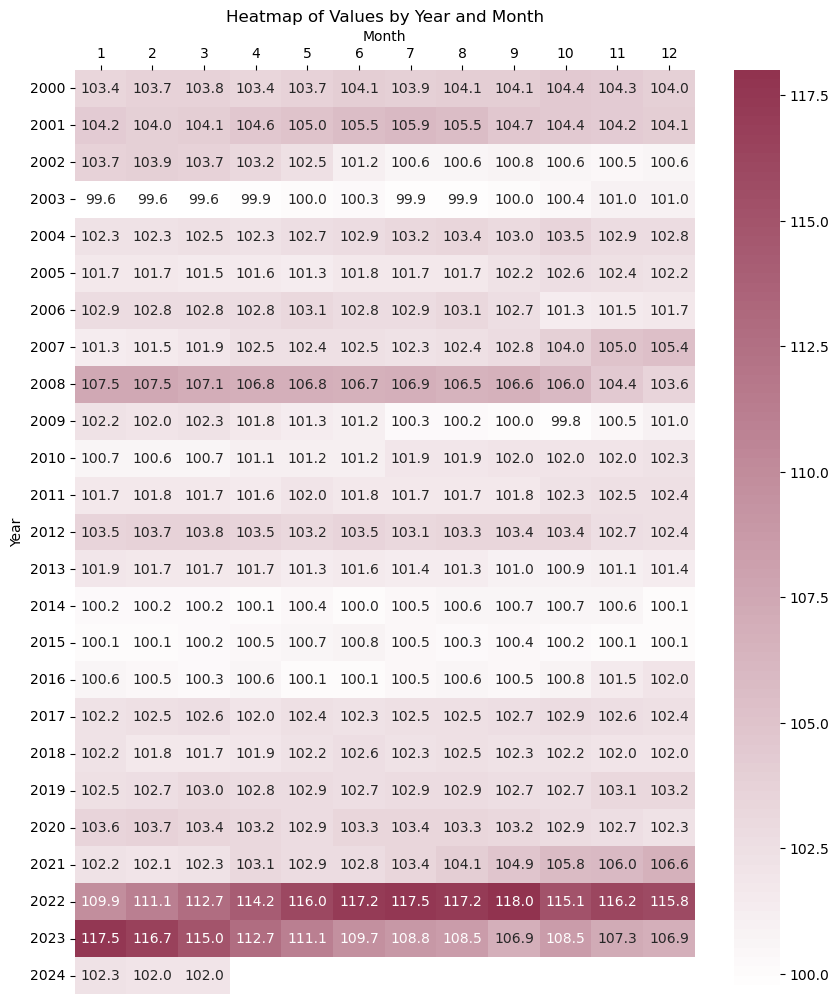

In [106]:
heatmap_monthly('total')